### Capstone Project-2 Auto Insurance Fraud Detection

## Pre-processing and Training Data 


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


In [2]:
# df = pd.read_parquet('fraud_eda.parquet')
df = pd.read_parquet('fraud_eda.parquet')
df.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,...,Deductible,DriverRating,Days_Policy_Accident,PastNumberOfClaims,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,21,Policy Holder,...,300,1,30,0,No,No,External,0,3,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,34,Policy Holder,...,400,4,30,0,Yes,No,External,0,1,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,47,Policy Holder,...,400,3,30,1,No,No,External,0,1,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,65,Third Party,...,400,2,30,1,Yes,No,External,5,1,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,27,Third Party,...,400,1,30,0,No,No,External,0,1,Collision


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15045 entries, 0 to 15419
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15045 non-null  object
 1   DayOfWeek             15045 non-null  object
 2   Make                  15045 non-null  object
 3   AccidentArea          15045 non-null  object
 4   DayOfWeekClaimed      15045 non-null  object
 5   MonthClaimed          15045 non-null  object
 6   Sex                   15045 non-null  object
 7   MaritalStatus         15045 non-null  object
 8   Age                   15045 non-null  int64 
 9   Fault                 15045 non-null  object
 10  PolicyType            15045 non-null  object
 11  VehicleCategory       15045 non-null  object
 12  VehiclePrice          15045 non-null  int32 
 13  FraudFound_P          15045 non-null  int64 
 14  Deductible            15045 non-null  int64 
 15  DriverRating          15045 non-null  int

In [4]:
# checking for null values in data
df.isnull().sum()

Month                   0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
PastNumberOfClaims      0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
NumberOfCars            0
BasePolicy              0
dtype: int64

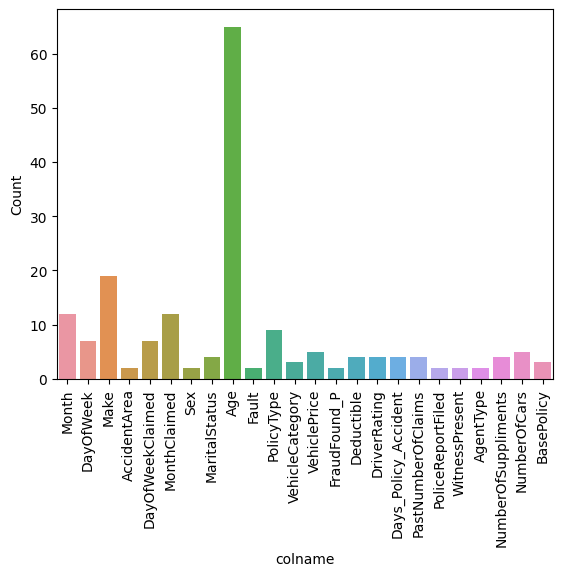

In [5]:
unique = df.nunique().to_frame()
unique.columns= ['Count']
unique.index.names = ['colname']
unique = unique.reset_index()
sns.barplot(x='colname',y='Count',data =unique)
plt.xticks(rotation=90)
plt.show()


In [6]:
# Create a new feature 'Age_bins'
df['Age_bins']=pd.cut(df.Age,bins=10,labels=range(1,11), retbins=False,include_lowest=True)
df[['Age', 'Age_bins']]

colname,Age,Age_bins
0,21,1
1,34,3
2,47,5
3,65,8
4,27,2
...,...,...
15415,35,3
15416,30,3
15417,24,2
15418,34,3


In [7]:
# Drop 'Age' from data 
df.drop(columns='Age', inplace=True)

In [8]:
# Seprate Traget variable from data
X= df.drop(columns='FraudFound_P')
y = df['FraudFound_P'] 

In [9]:
# list of categorical and numerical columns
ohe_col = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 
           'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled',
           'WitnessPresent', 'AgentType', 'BasePolicy']

std_col = ['VehiclePrice','Deductible', 'DriverRating','Days_Policy_Accident', 'PastNumberOfClaims',
            'NumberOfSuppliments', 'NumberOfCars', 'Age_bins']

Apply One-hot encoding and Standard scaler by using Column transformer


In [10]:
ct = ColumnTransformer(transformers=[
     ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),ohe_col),
     ('tnf2', StandardScaler(),std_col)], remainder='passthrough')

In [11]:
X= ct.fit_transform(X)

In [12]:
X.shape, y.shape

((15045, 81), (15045,))

In [13]:
# print new feature names afrer applying one-hot encoding
ohe_col = ct.named_transformers_['tnf1'].get_feature_names_out().tolist()
print(ohe_col)

['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW', 'AccidentArea_Urban', 'DayOfWeekClaimed_Monday', 'DayOfWeekClaimed_Saturday', 'DayOfWeekClaimed_Sunday', 'DayOfWeekClaimed_Thursday', 'DayOfWeekClaimed_Tuesday', 'DayOfWeekClaimed_Wednesday', 'MonthClaimed_Aug', 'MonthClaimed_Dec', 'MonthClaimed_Feb', 'MonthClaimed_Jan', 'MonthClaimed_Jul', 'MonthClaimed_Jun', 'MonthClaimed_Mar', 'MonthClaimed_May', 'MonthClaimed_Nov', 'MonthClaimed_Oct', 'MonthClaimed_Sep', 'Sex_Male', 'MaritalStatus_Married', 'MaritalStatus_Si

In [14]:
# convert X from array to data frame with new feature names
X = pd.DataFrame(X, columns=[ohe_col+std_col])
print(X.shape, y.shape)
X.head(2) 

(15045, 81) (15045,)


,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,...,BasePolicy_Collision,BasePolicy_Liability,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,PastNumberOfClaims,NumberOfSuppliments,NumberOfCars,Age_bins
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.498552,-2.426906,-1.329100,0.086543,-1.162554,-0.886113,4.724616,-1.717954
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.498552,-0.177473,1.348261,0.086543,-1.162554,-0.886113,-0.251014,-0.689438


In [15]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [16]:
X[ohe_col].describe()

,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,...,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability
count,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,...,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000
mean,0.074377,0.083217,0.080558,0.089598,0.082087,0.085876,0.086873,0.088401,0.078897,0.086208,...,0.021868,0.001994,0.001329,0.345630,0.025191,0.027650,0.005583,0.015952,0.389831,0.323363
std,0.262392,0.276219,0.272165,0.285614,0.274506,0.280190,0.281658,0.283887,0.269586,0.280680,...,0.146256,0.044611,0.036437,0.475589,0.156710,0.163974,0.074515,0.125295,0.487728,0.467776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X[std_col].std()

VehiclePrice            1.000033
Deductible              1.000033
DriverRating            1.000033
Days_Policy_Accident    1.000033
PastNumberOfClaims      1.000033
NumberOfSuppliments     1.000033
NumberOfCars            1.000033
Age_bins                1.000033
dtype: float64

In [18]:
X[std_col].mean()

VehiclePrice            1.860186e-16
Deductible              8.762571e-16
DriverRating           -2.334531e-16
Days_Policy_Accident   -1.255343e-15
PastNumberOfClaims     -6.303440e-16
NumberOfSuppliments     9.920169e-16
NumberOfCars           -5.726448e-16
Age_bins                5.618636e-17
dtype: float64

In [19]:
# from sklearn.decomposition import PCA
# data_pca = PCA(n_components=2).fit_transform(X)
# variance = state_pca.explained_variance_ratio_.cumsum()

In [20]:
# plt.subplots(figsize=(10, 6))
# plt.plot(state_pca.explained_variance_ratio_.cumsum())
# plt.xlabel('Component #')
# plt.ylabel('Cumulative ratio variance')
# plt.title('Cumulative variance ratio explained by PCA components for summary statistics')

In [21]:
# 35 components seem to account for over 95% of the variance.

Selecting best features and spliting data into training and testing subsets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)
X_train.shape, y_train.shape

((12036, 81), (12036,))

In [23]:
mutual_inmfo = mutual_info_classif(X_train, y_train)

In [24]:
mutual_info = pd.Series(mutual_inmfo)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending =False)

PolicyType_Sedan - Liability    0.018149
Fault_Third Party               0.015155
BasePolicy_Liability            0.014854
VehicleCategory_Sport           0.012402
DayOfWeek_Saturday              0.004806
                                  ...   
MonthClaimed_Jul                0.000000
MonthClaimed_Mar                0.000000
MonthClaimed_May                0.000000
MonthClaimed_Oct                0.000000
MonthClaimed_Jun                0.000000
Length: 81, dtype: float64

<Axes: >

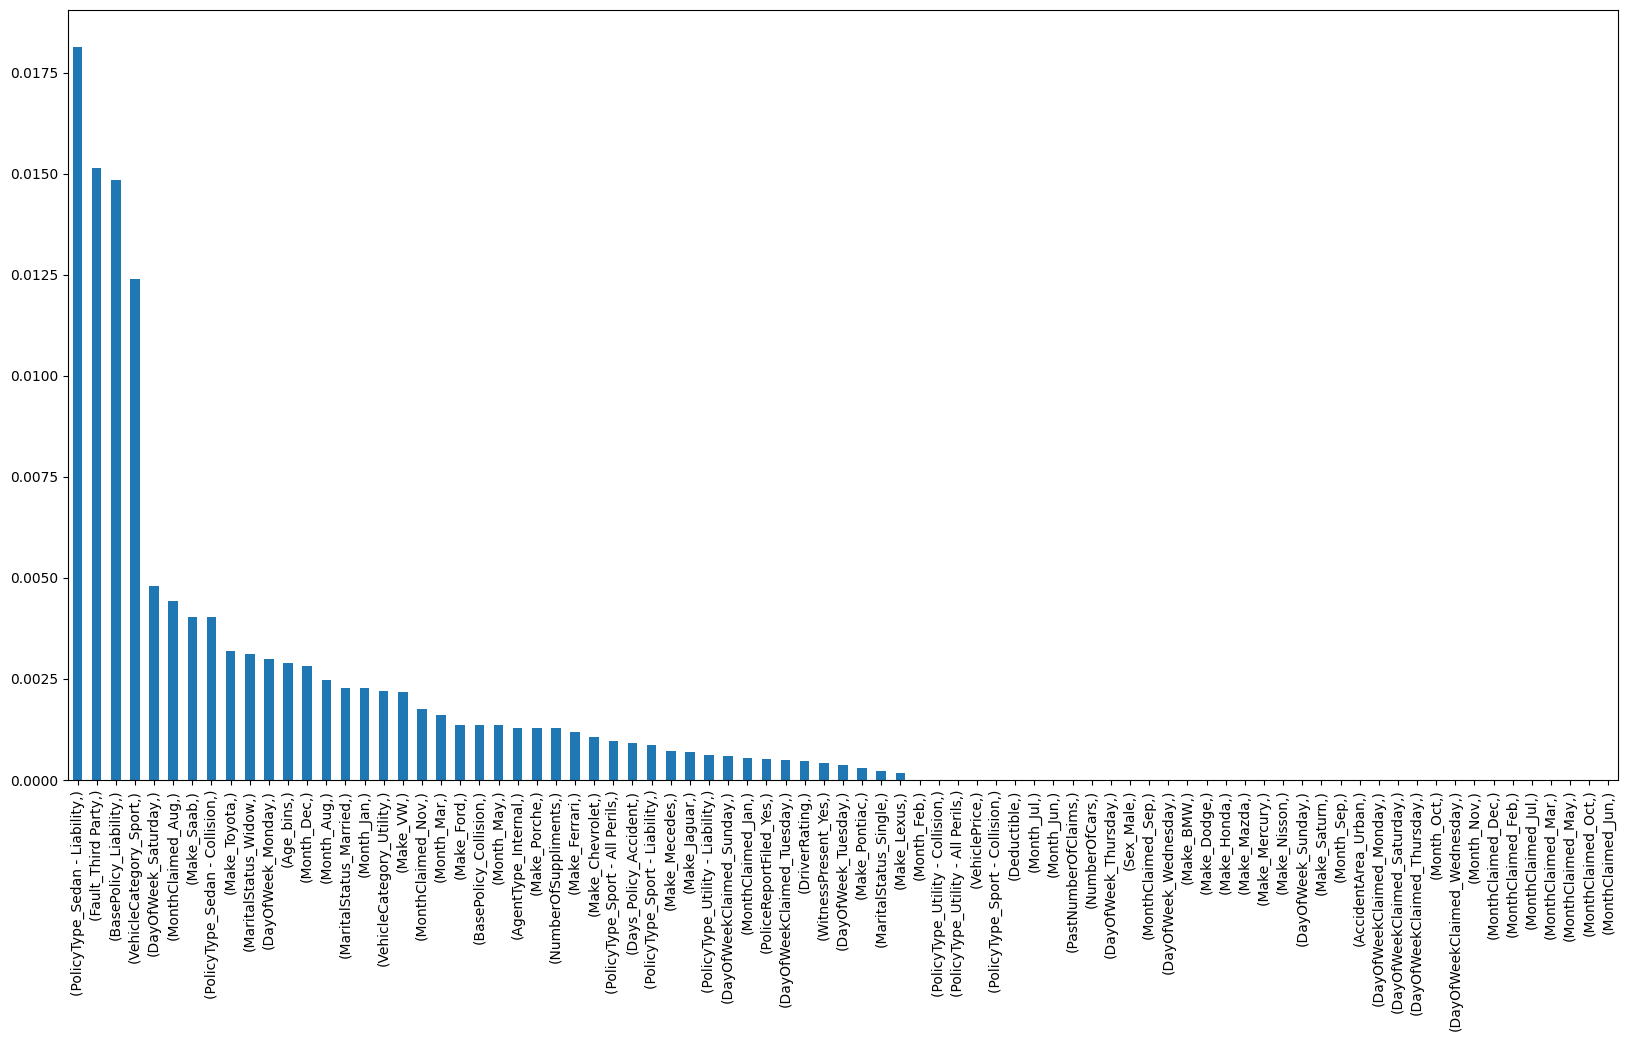

In [25]:
mutual_info.sort_values(ascending =False).plot.bar(figsize =(20,10))

In [30]:
best_feaures = mutual_info.sort_values(ascending =False)
best_feaures[best_feaures>0].count()

44

In [31]:
sel_44 = SelectKBest(mutual_info_classif, k=44)
sel_44.fit(X_train, y_train)
X_train.columns[sel_44.get_support()]

MultiIndex([(                     'Month_Aug',),
            (                     'Month_Feb',),
            (                     'Month_Jan',),
            (                     'Month_Jul',),
            (                     'Month_Jun',),
            (                     'Month_Mar',),
            (                     'Month_May',),
            (                     'Month_Oct',),
            (                     'Month_Sep',),
            (              'DayOfWeek_Sunday',),
            (             'DayOfWeek_Tuesday',),
            (           'DayOfWeek_Wednesday',),
            (                'Make_Chevrolet',),
            (                    'Make_Dodge',),
            (                     'Make_Ford',),
            (                    'Make_Lexus',),
            (                  'Make_Mecedes',),
            (                  'Make_Mercury',),
            (                  'Make_Pontiac',),
            (                   'Make_Porche',),
            (       

In [32]:
X_train_new = X_train[X_train.columns[sel_44.get_support()]]
X_test_new = X_test[X_train.columns[sel_44.get_support()]]

In [33]:
# trainng and testing subsets are ready for the next process
X_train_new.shape , X_test_new.shape, y_train.shape, y_test.shape

((12036, 44), (3009, 44), (12036,), (3009,))